# Benchmarking Results

In [61]:
import matplotlib.pyplot as plt
from capo.analysis.utils import (
    get_results,
    # aggregate_results,
    # get_prompt_scores,
    generate_comparison_table,
)
from capo.analysis.visualizations import (
    # plot_population_scores,
    # plot_population_members,
    plot_population_scores_comparison,
    plot_length_score,
    plot_performance_profile_curve,
)

In [3]:
OPTIMS = ["CAPO", "OPRO", "EvoPromptGA", "PromptWizard", "Initial"]
OPTIMS_NO_WIZ = ["CAPO", "EvoPromptGA", "OPRO", "Initial"]
OPTIMS_NO_SING = ["CAPO", "EvoPromptGA", "OPRO"]
DATASETS = ["sst-5", "agnews", "copa", "gsm8k", "subj"]
MODELS = ["llama", "qwen", "mistral"]

In [4]:
%load_ext autoreload
%autoreload 2

We always use mean for aggregation since this better depicts the overall optimization process.

# Performance Profile

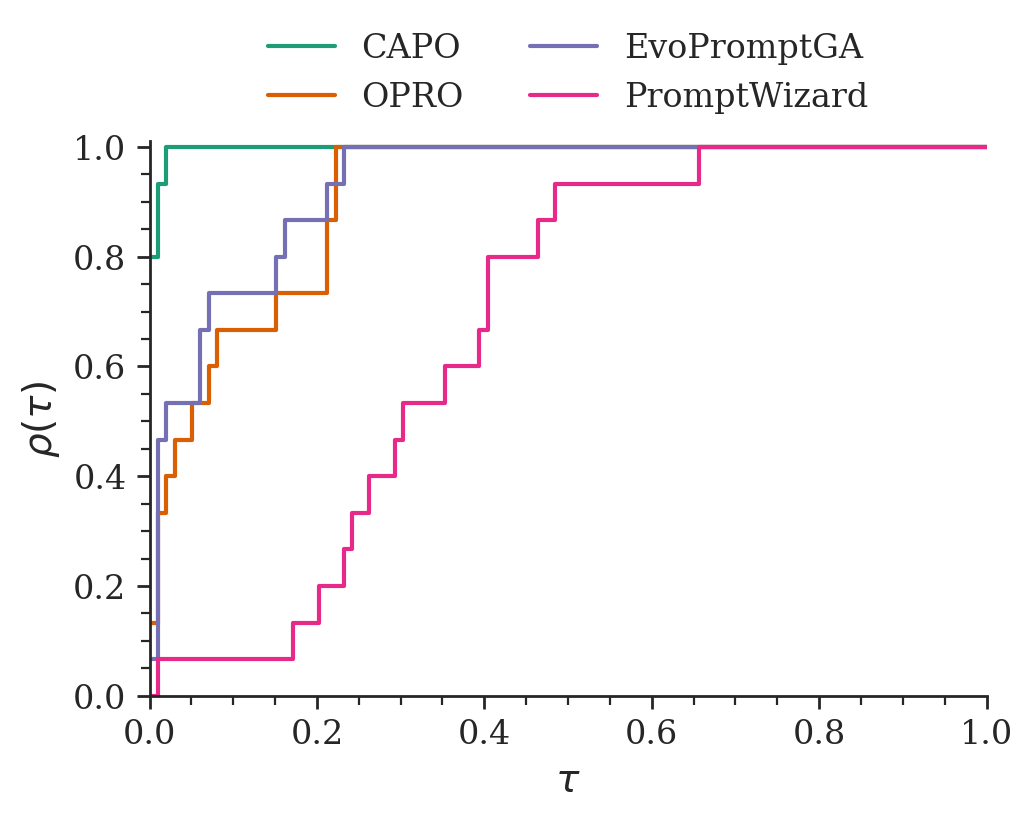

In [87]:
fig = plot_performance_profile_curve(path_prefix="../..")
fig.savefig(f"../../results/plots/performance_profile_curve.png", bbox_inches="tight")

# Benchmark Results

## Mistral

In [32]:
generate_comparison_table(model="mistral", path_prefix="../..")

,sst-5,agnews,subj,gsm8k,copa,avg
Initial,48.69±3.05,72.21±7.70,61.65±6.26,33.71±6.10,94.56±0.97,62.17
OPRO,53.20±3.46,84.20±0.20,77.07±0.12,43.53±0.58,96.33±0.42,70.87
PromptWizard,31.07±4.66,44.40±31.55,59.00±6.24,48.67±7.91,57.47±12.59,48.12
EvoPromptGA,54.93±1.15,84.40±0.35,74.93±2.50,43.93±4.72,96.13±0.42,70.87
CAPO,60.20±0.40,84.33±2.61,81.67±2.01,65.07±1.47,95.13±1.47,77.28


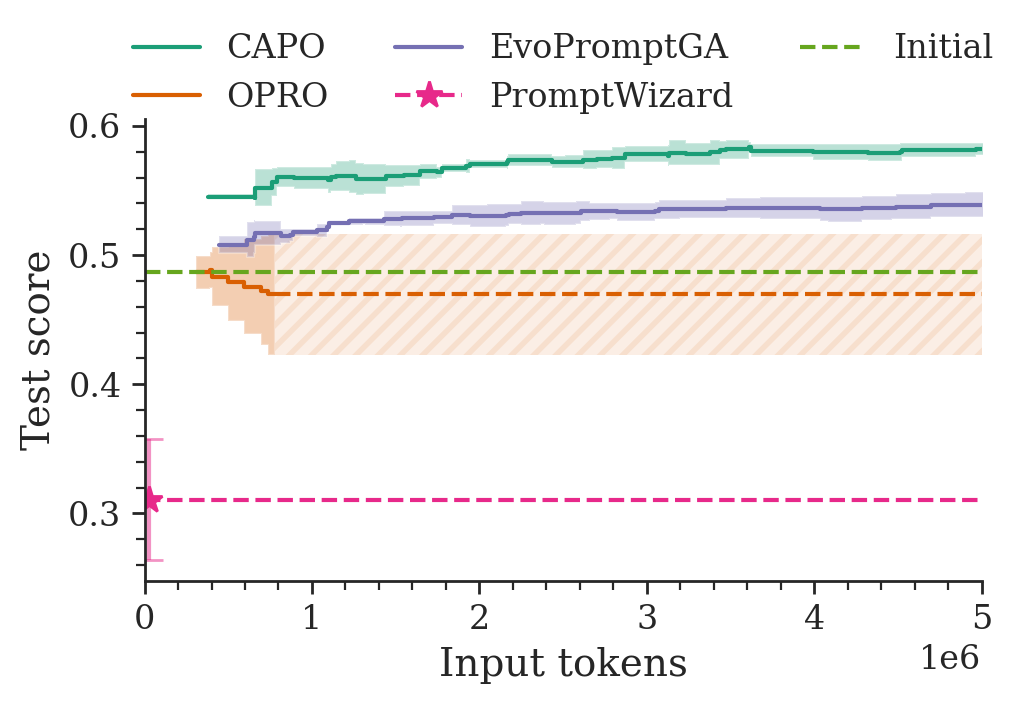

In [82]:
plot_population_scores_comparison(
    "sst-5",
    "mistral",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
    figsize=(5.4, 3),
);

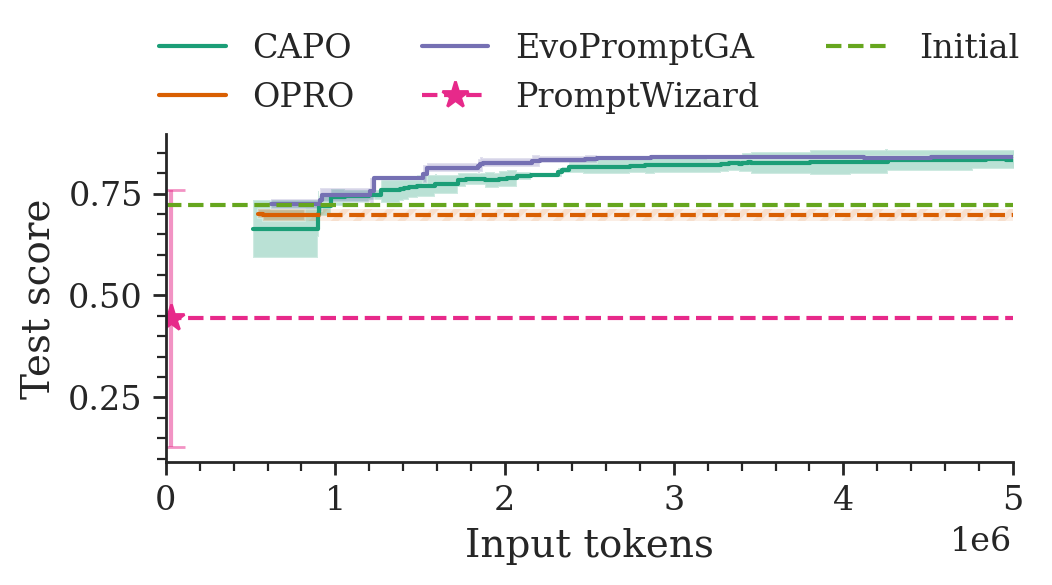

In [7]:
plot_population_scores_comparison(
    "agnews",
    "mistral",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

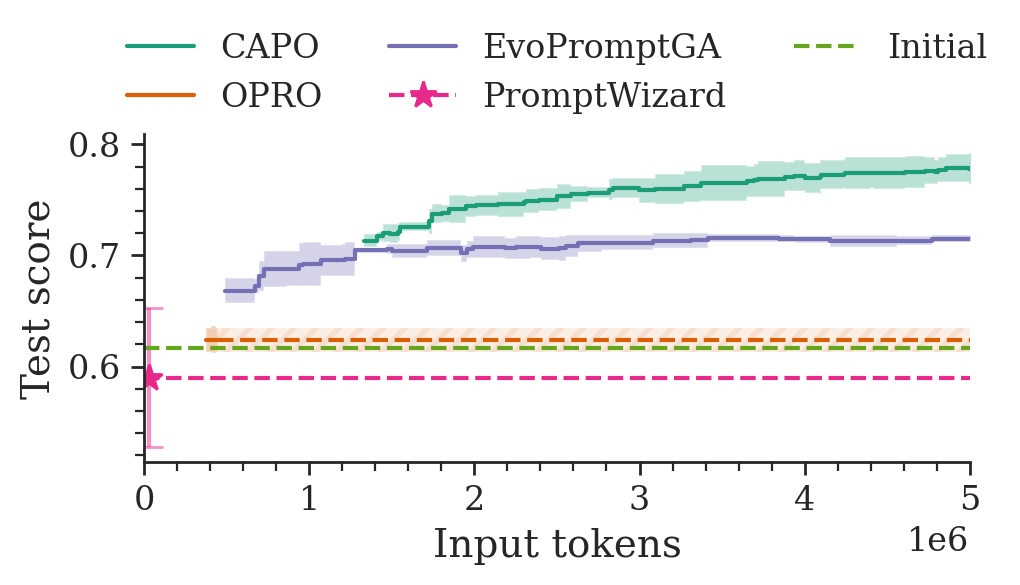

In [8]:
plot_population_scores_comparison(
    "subj",
    "mistral",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

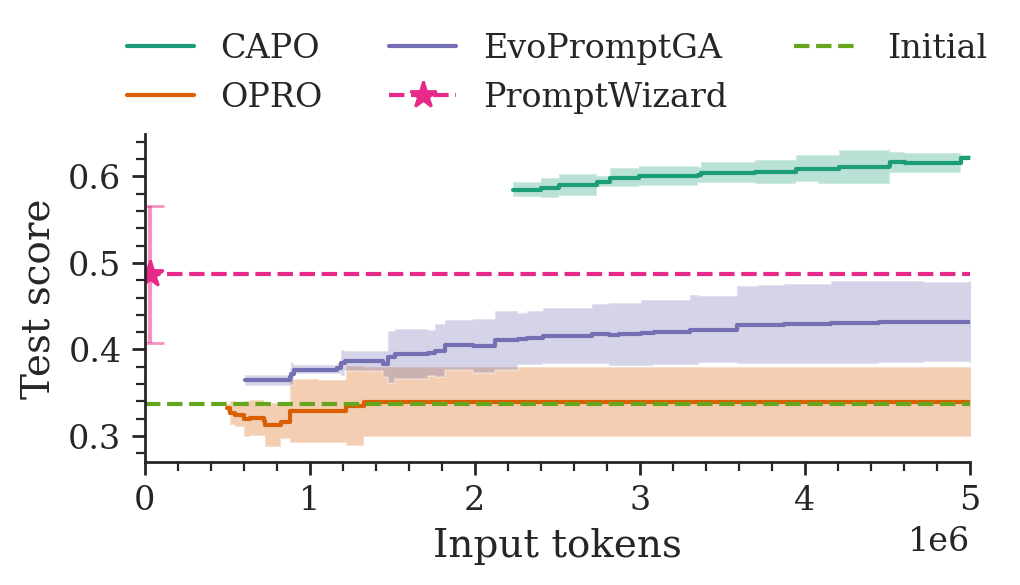

In [9]:
plot_population_scores_comparison(
    "gsm8k",
    "mistral",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

--> use in main paper next to table

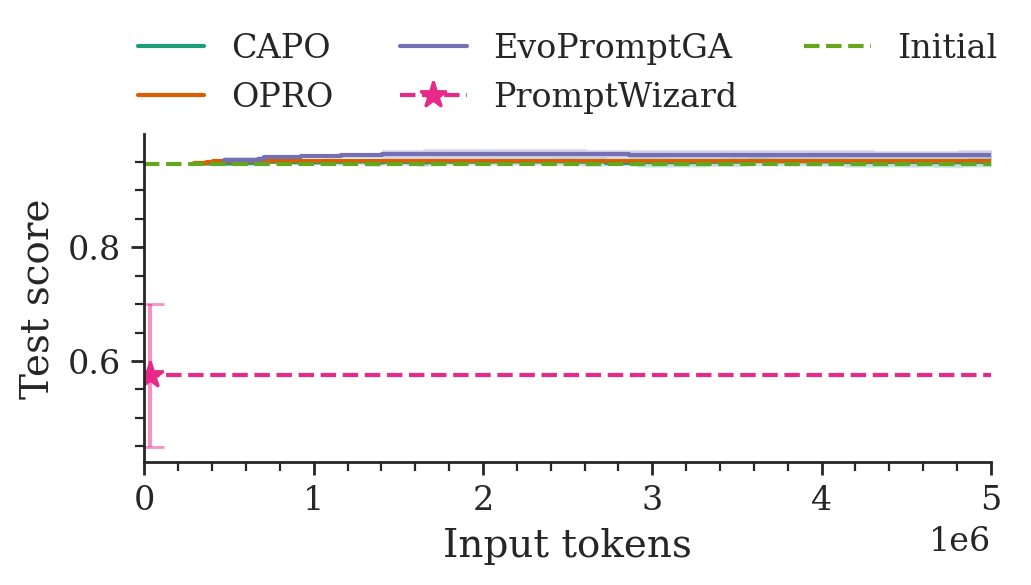

In [10]:
plot_population_scores_comparison(
    "copa",
    "mistral",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

## Qwen

In [30]:
generate_comparison_table(model="qwen", path_prefix="../../")

,sst-5,agnews,subj,gsm8k,copa,avg
Initial,56.68±2.00,79.57±0.87,62.85±4.69,33.08±8.05,98.27±0.45,66.09
OPRO,57.00±0.53,79.87±0.23,70.67±2.89,46.33±3.75,98.67±0.42,70.51
PromptWizard,39.73±15.07,63.47±34.89,64.93±6.13,15.27±24.73,98.13±0.23,56.31
EvoPromptGA,58.60±2.12,81.73±2.05,75.87±4.39,61.27±10.28,97.87±0.81,75.07
CAPO,59.07±0.61,87.07±0.99,91.00±0.80,60.20±5.90,98.47±0.23,79.16


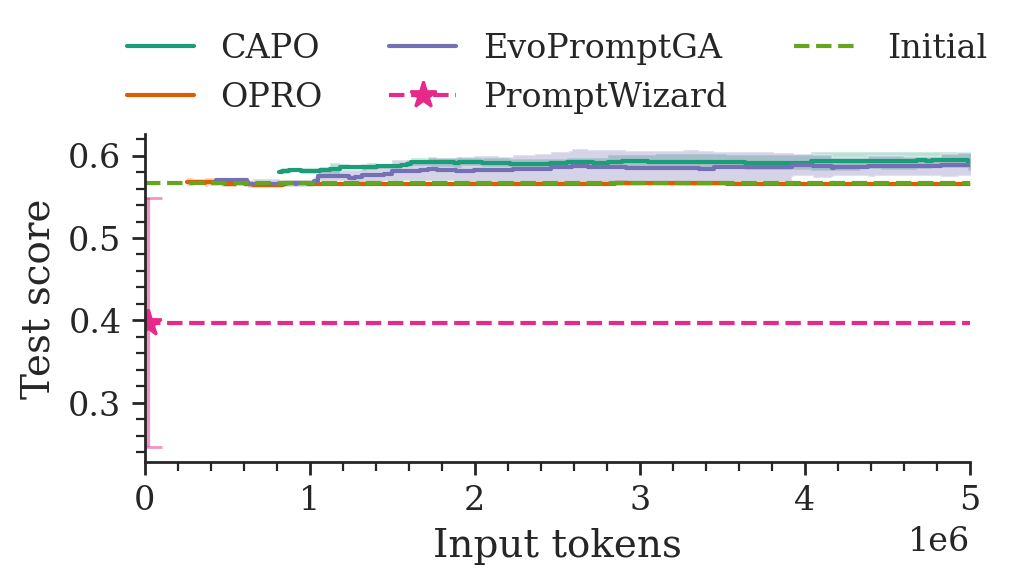

In [12]:
plot_population_scores_comparison(
    "sst-5",
    "qwen",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

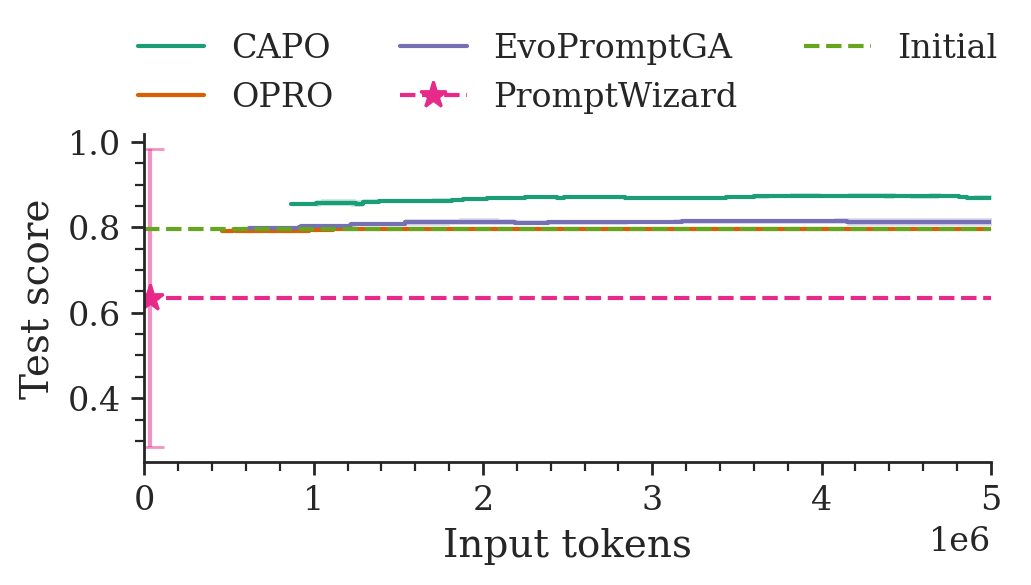

In [13]:
plot_population_scores_comparison(
    "agnews",
    "qwen",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

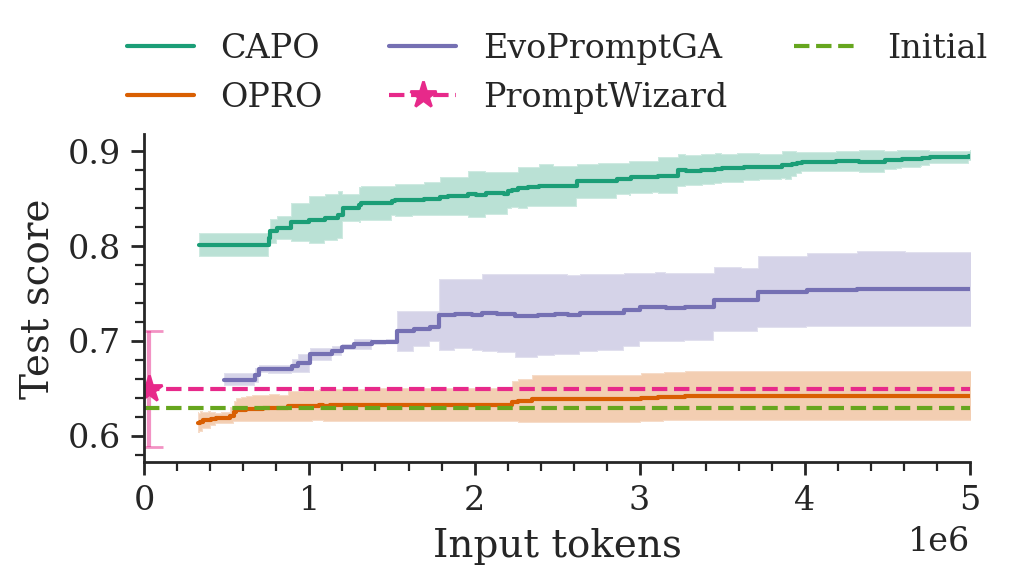

In [14]:
plot_population_scores_comparison(
    "subj",
    "qwen",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

--> use in main paper on first side because it is beautiful 💕

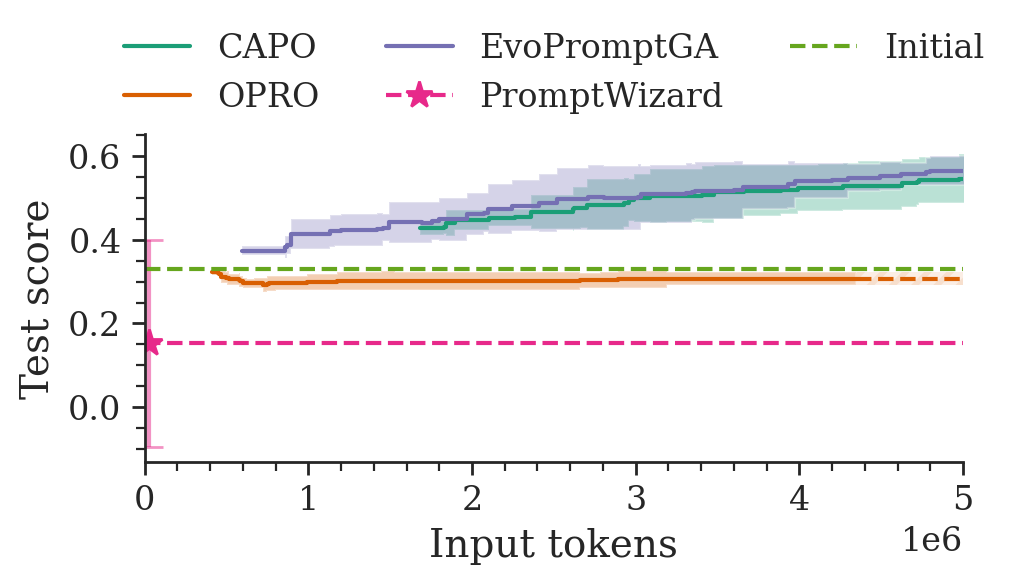

In [15]:
plot_population_scores_comparison(
    "gsm8k",
    "qwen",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

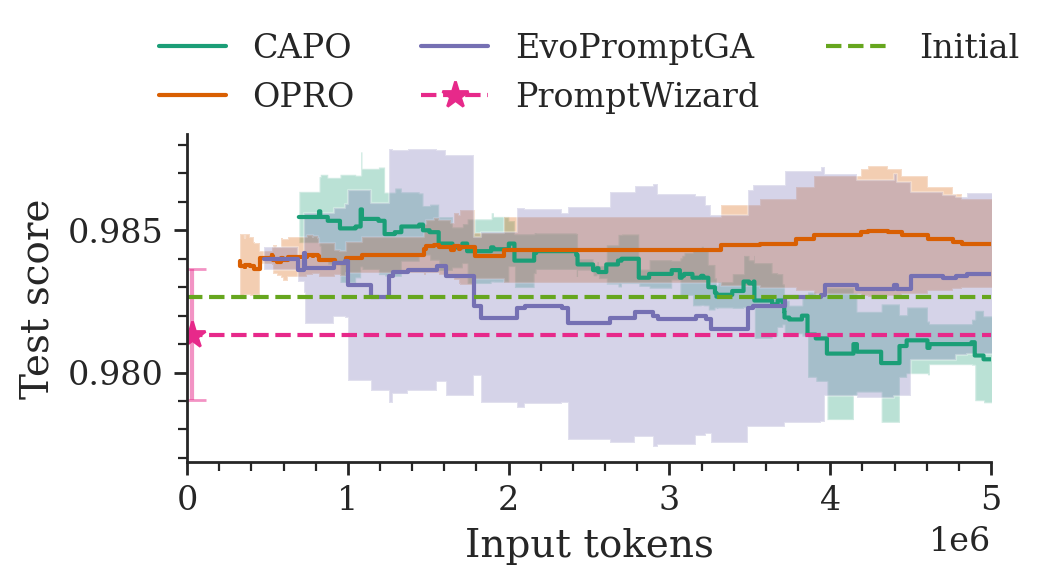

In [16]:
plot_population_scores_comparison(
    "copa",
    "qwen",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

## Llama

In [31]:
generate_comparison_table(model="llama", path_prefix="../../")

,sst-5,agnews,subj,gsm8k,copa,avg
Initial,58.47±1.59,87.06±0.68,62.00±5.40,44.28±5.08,97.65±1.36,69.89
OPRO,60.87±1.33,88.20±0.60,71.33±3.43,51.87±2.50,98.07±0.70,74.07
PromptWizard,32.80±2.12,23.33±0.23,51.93±0.31,39.33±18.48,50.33±0.42,39.55
EvoPromptGA,60.53±1.68,88.67±0.50,75.53±1.70,50.87±0.90,97.60±1.39,74.64
CAPO,62.27±0.42,88.80±0.92,91.60±2.65,73.73±4.57,98.27±0.64,82.93


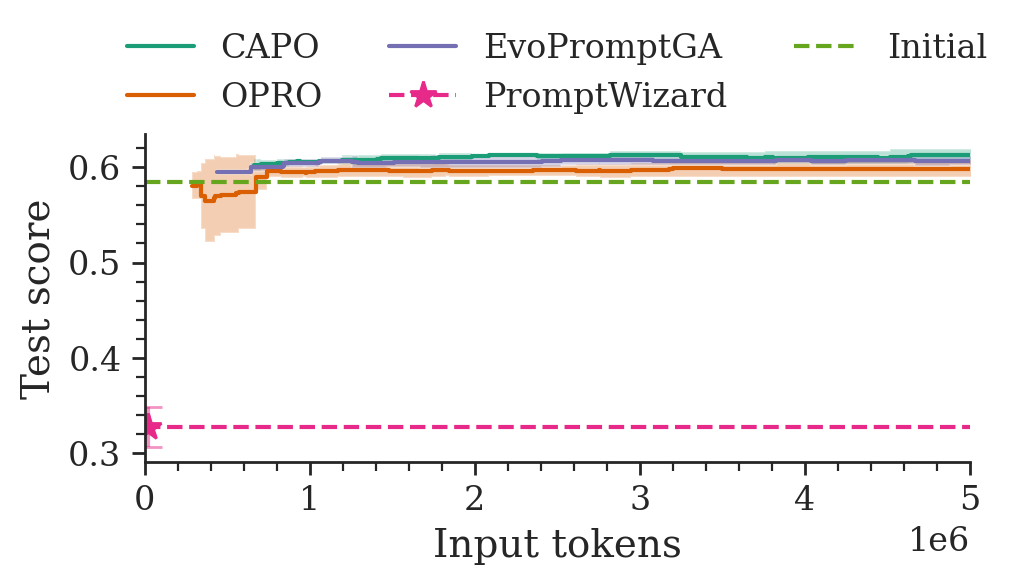

In [18]:
plot_population_scores_comparison(
    "sst-5",
    "llama",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

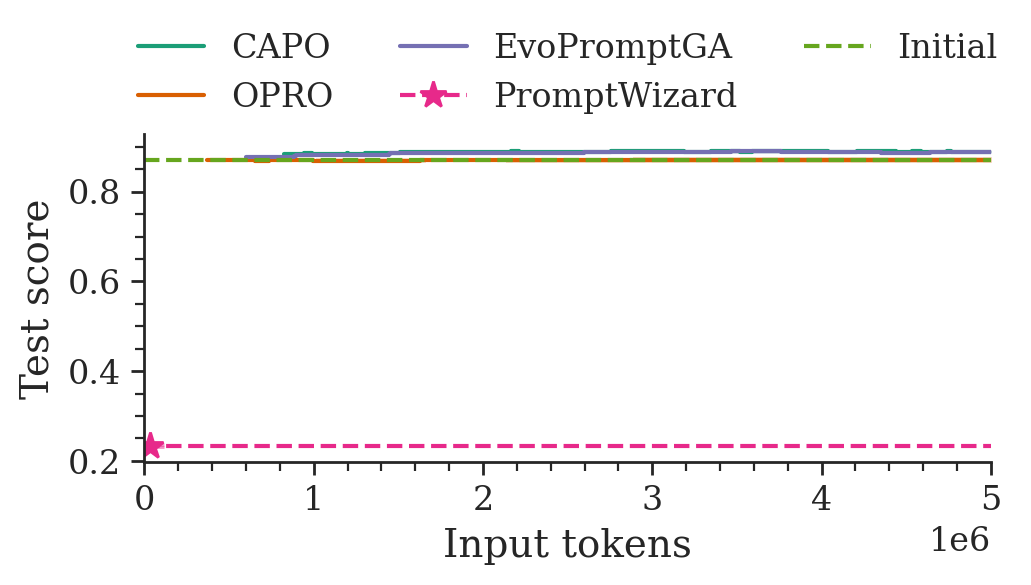

In [19]:
plot_population_scores_comparison(
    "agnews",
    "llama",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

PromptWizard performs really bad for Llama

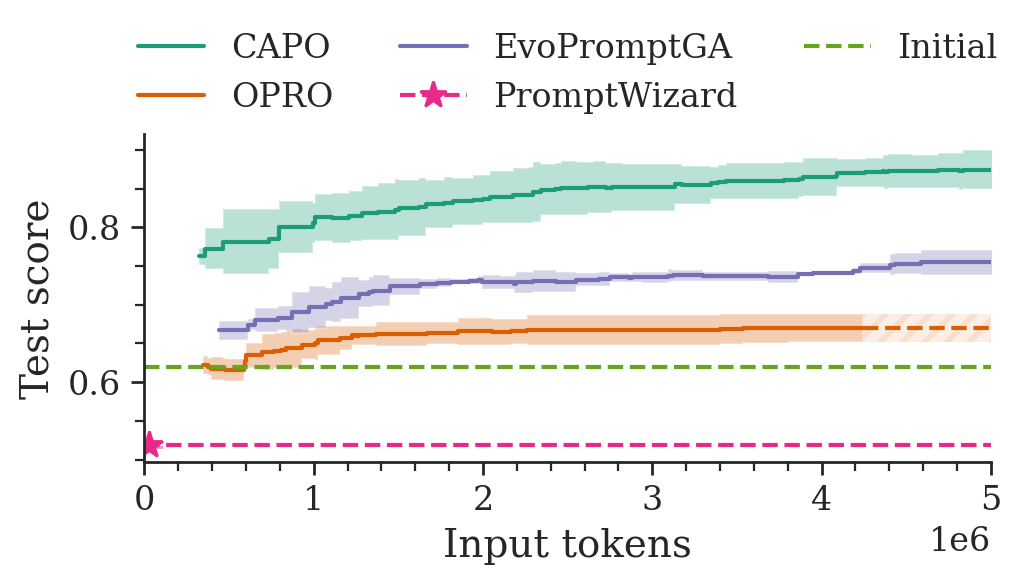

In [20]:
plot_population_scores_comparison(
    "subj",
    "llama",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

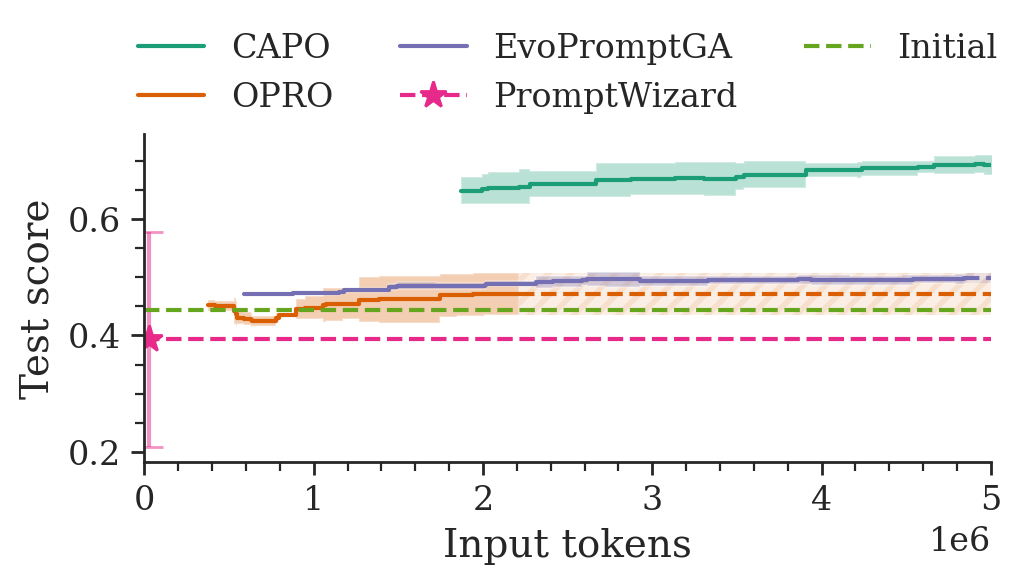

In [21]:
plot_population_scores_comparison(
    "gsm8k",
    "llama",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

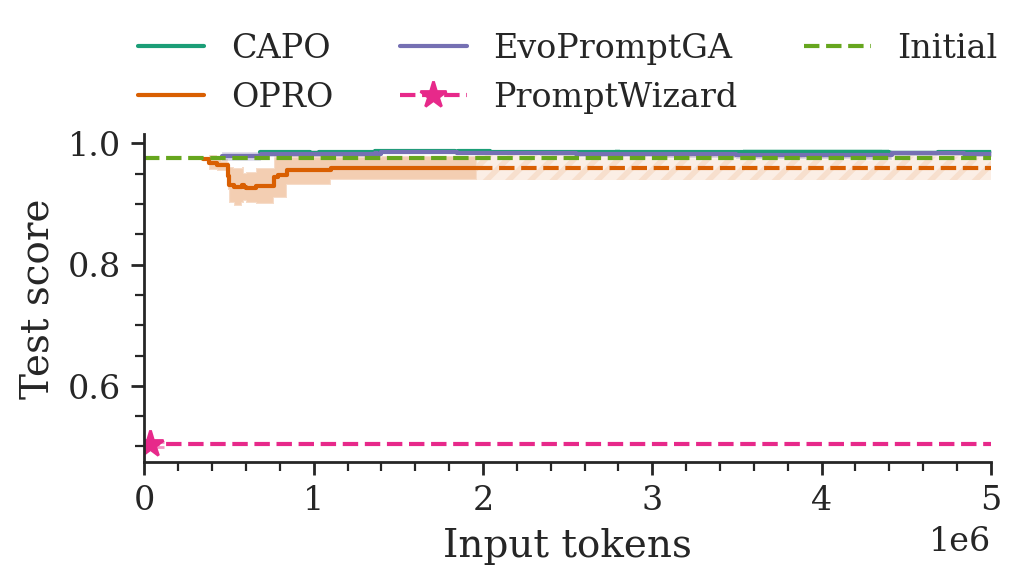

In [22]:
plot_population_scores_comparison(
    "copa",
    "llama",
    OPTIMS,
    agg="mean",
    plot_seeds=False,
    plot_stddev=True,
    x_col="input_tokens_cum",
    path_prefix="../..",
);

Candidates for main paper
- GSM8K (because its most relevant dataset)
- Subj using qwen (because it has beautiful curves)

Takeaways:
- PromptWizard's performance is highly dependend on model used (=> strict templates!)

# Table Results

In [23]:
for model in MODELS:
    print(f"{model}")
    display(generate_comparison_table(model=model, cutoff_tokens=1_000_000, path_prefix="../.."))

llama


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,58.47±1.59,87.06±0.68,62.00±5.40,44.28±5.08,97.65±1.36,69.89
OPRO,59.33±1.50,88.20±0.60,71.33±3.43,51.73±2.30,98.07±0.70,73.73
PromptWizard,32.80±2.12,23.33±0.23,51.93±0.31,39.33±18.48,50.33±0.42,39.55
EvoPromptGA,60.47±1.63,88.73±0.50,74.27±3.07,50.20±0.87,98.53±0.23,74.44
CAPO,61.67±1.01,89.20±0.72,90.00±0.35,76.50±3.54,98.27±0.64,83.13


qwen


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,56.68±2.00,79.57±0.87,62.85±4.69,33.08±8.05,98.27±0.45,66.09
OPRO,57.40±0.20,80.00±0.00,69.40±0.69,46.33±3.75,98.53±0.23,70.33
PromptWizard,39.73±15.07,63.47±34.89,64.93±6.13,15.27±24.73,98.13±0.23,56.31
EvoPromptGA,57.07±0.81,80.27±0.90,71.93±1.92,54.33±13.80,98.33±0.70,72.39
CAPO,59.87±1.14,87.27±1.03,87.13±2.20,54.40±nan,98.67±0.31,77.47


mistral


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,48.69±3.05,72.21±7.70,61.65±6.26,33.71±6.10,94.56±0.97,62.17
OPRO,53.20±3.46,84.20±0.20,77.07±0.12,43.53±0.58,96.33±0.42,70.87
PromptWizard,31.07±4.66,44.40±31.55,59.00±6.24,48.67±7.91,57.47±12.59,48.12
EvoPromptGA,54.20±2.42,83.87±1.53,77.80±0.00,41.13±3.58,96.33±0.76,70.67
CAPO,56.73±1.45,84.13±1.94,77.00±2.83,nan±nan,95.40±1.31,78.32


In [24]:
for model in MODELS:
    print(f"Model: {model}")
    display(generate_comparison_table(model=model, cutoff_tokens=3_000_000, path_prefix="../../"))

Model: llama


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,58.47±1.59,87.06±0.68,62.00±5.40,44.28±5.08,97.65±1.36,69.89
OPRO,61.73±1.33,88.20±0.60,71.33±3.43,51.87±2.50,98.07±0.70,74.24
PromptWizard,32.80±2.12,23.33±0.23,51.93±0.31,39.33±18.48,50.33±0.42,39.55
EvoPromptGA,60.53±1.68,88.93±0.64,74.93±1.33,51.27±1.17,97.40±1.25,74.61
CAPO,62.33±0.46,89.47±0.42,88.13±2.37,74.80±3.86,98.27±0.64,82.60


Model: qwen


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,56.68±2.00,79.57±0.87,62.85±4.69,33.08±8.05,98.27±0.45,66.09
OPRO,57.40±0.20,79.87±0.23,70.67±2.89,46.33±3.75,98.47±0.31,70.55
PromptWizard,39.73±15.07,63.47±34.89,64.93±6.13,15.27±24.73,98.13±0.23,56.31
EvoPromptGA,58.07±2.91,81.67±1.17,75.20±3.94,59.13±13.93,97.87±0.81,74.39
CAPO,59.93±0.90,87.00±0.72,89.93±1.80,58.53±3.63,98.20±0.35,78.72


Model: mistral


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,48.69±3.05,72.21±7.70,61.65±6.26,33.71±6.10,94.56±0.97,62.17
OPRO,53.20±3.46,84.20±0.20,77.07±0.12,43.53±0.58,96.33±0.42,70.87
PromptWizard,31.07±4.66,44.40±31.55,59.00±6.24,48.67±7.91,57.47±12.59,48.12
EvoPromptGA,54.60±1.00,84.40±0.35,73.73±4.00,43.00±3.52,96.13±0.42,70.37
CAPO,60.20±0.40,84.00±2.16,80.07±1.22,63.20±4.69,95.13±1.47,76.52


In [34]:
for model in MODELS:
    print(f"{model}")
    display(generate_comparison_table(model=model, path_prefix="../.."))

llama


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,58.47±1.59,87.06±0.68,62.00±5.40,44.28±5.08,97.65±1.36,69.89
OPRO,60.87±1.33,88.20±0.60,71.33±3.43,51.87±2.50,98.07±0.70,74.07
PromptWizard,32.80±2.12,23.33±0.23,51.93±0.31,39.33±18.48,50.33±0.42,39.55
EvoPromptGA,60.53±1.68,88.67±0.50,75.53±1.70,50.87±0.90,97.60±1.39,74.64
CAPO,62.27±0.42,88.80±0.92,91.60±2.65,73.73±4.57,98.27±0.64,82.93


qwen


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,56.68±2.00,79.57±0.87,62.85±4.69,33.08±8.05,98.27±0.45,66.09
OPRO,57.00±0.53,79.87±0.23,70.67±2.89,46.33±3.75,98.67±0.42,70.51
PromptWizard,39.73±15.07,63.47±34.89,64.93±6.13,15.27±24.73,98.13±0.23,56.31
EvoPromptGA,58.60±2.12,81.73±2.05,75.87±4.39,61.27±10.28,97.87±0.81,75.07
CAPO,59.07±0.61,87.07±0.99,91.00±0.80,60.20±5.90,98.47±0.23,79.16


mistral


,sst-5,agnews,subj,gsm8k,copa,avg
Initial,48.69±3.05,72.21±7.70,61.65±6.26,33.71±6.10,94.56±0.97,62.17
OPRO,53.20±3.46,84.20±0.20,77.07±0.12,43.53±0.58,96.33±0.42,70.87
PromptWizard,31.07±4.66,44.40±31.55,59.00±6.24,48.67±7.91,57.47±12.59,48.12
EvoPromptGA,54.93±1.15,84.40±0.35,74.93±2.50,43.93±4.72,96.13±0.42,70.87
CAPO,60.20±0.40,84.33±2.61,81.67±2.01,65.07±1.47,95.13±1.47,77.28


If we cutoff very early (already at 1_000_000 we outperform the other optimizers in nearly all cases)

## Prompt Length Analysis

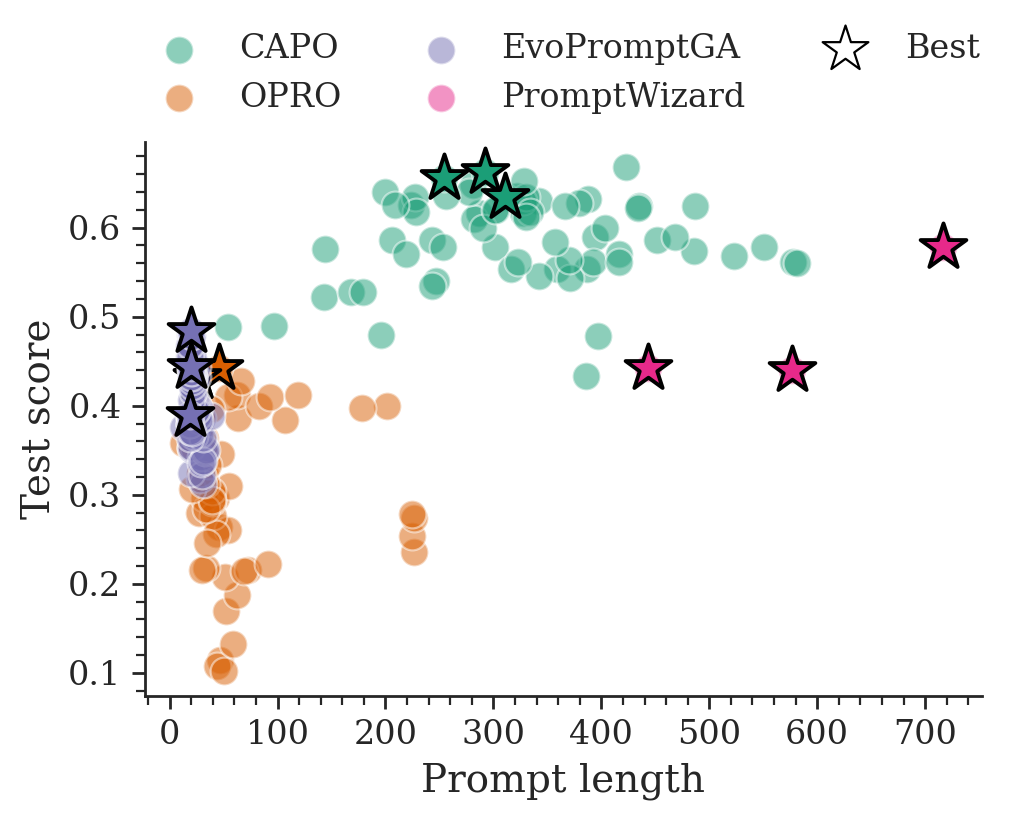

In [55]:
fig = plot_length_score(
    "gsm8k",
    "mistral",
    ["CAPO", "OPRO", "EvoPromptGA", "PromptWizard"],
    x_col="prompt_len",
    score_col="test_score",
    log_scale=False,
    path_prefix="../..",
)
plt.savefig(
    f"../../results/plots/gsm8k_mistral_prompt_length_score.png",
    bbox_inches="tight",
)

=> maybe we are cost aware in the sense that we are evaluating the entire "front" (EvoPrompt and Opro are very short and Promptwizard very long)

- promptwizard has extremly long prompts, that only sometimes can compete with competitors

=> interesting for plotting: 
- subj using qwen or gsm8k using mistral => shows that we have a huge range

In [58]:
from pprint import pprint as pp

In [59]:
# print best prompt per dataset, model, optimizer
for dataset in DATASETS:
    for model in MODELS:
        for optim in OPTIMS:
            print(f"Dataset: {dataset}, Model: {model}, Optimizer: {optim}")
            df = get_results(
                dataset=dataset,
                model=model,
                optim=optim,
                # sort_by="test_score",
                # ascending=False,
                path_prefix="../../",
            )

            if df.empty:
                continue
            p, s = df.nlargest(1, "test_score")[["prompt", "test_score"]].values[0]
            print(s)
            print("'''")
            pp(p)
            print("'''")

Dataset: sst-5, Model: llama, Optimizer: CAPO
0.636
'''
('Assess the emotional tone conveyed in the provided movie review, then '
 'categorize it into one of five sentiment levels: very negative, negative, '
 'neutral, positive, or very positive, and encapsulate your chosen category '
 'within <final_answer> </final_answer> tags, following this format: '
 '<final_answer> selected_sentiment </final_answer>, to clearly denote the '
 'sentiment classification of the film review.\r\n'
 '\r\n'
 'Input:\r\n'
 '-lrb- reno -rrb- delivers a monologue that manages to incorporate both the '
 'horror and the absurdity of the situation in a well-balanced fashion .\r\n'
 'Output:\r\n'
 '<final_answer> positive </final_answer>\r\n'
 '\r\n'
 'Input:\r\n'
 "a rip-roaring comedy action fest that 'll put hairs on your chest .\r\n"
 'Output:\r\n'
 '<final_answer>positive</final_answer>\r\n'
 '\r\n'
 'Input:')
'''
Dataset: sst-5, Model: llama, Optimizer: OPRO
0.63
'''
("Analyze the movie review's sentiment

capo can be very repetitive? (SST-5 mistral) potentially the crossover meta prompt has been misinterpreted (merge the two prompts) => however it is performing superior!

subj for qwen and llama with capo has a crazy outlier to the top
